In [ ]:
%pip install micrograd 
%pip install graphviz

In [5]:
from micrograd.engine import Value
from graphviz import Digraph
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def func(x):
    return 3*x**2 + 4*x - 5

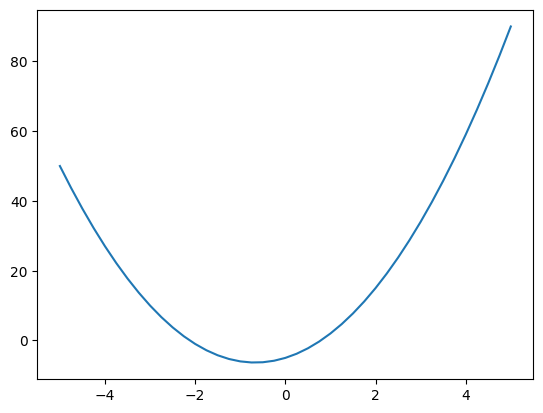

In [7]:
xs=np.arange(-5,5.25,0.25)
ys= func(xs)
plt.plot(xs,ys)



In [8]:
class Value:
  def __init__(self,data, _children=(), _op='', label=''):
    self.data=data
    self._prev=set(_children)
    self.grad=0.0
    self._op=_op
    self.label=label


  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self,other):
    s=Value(self.data+other.data, (self, other), '+')
    return s
  
  def __mul__(self,other):
    m=Value(self.data*other.data, (self, other), '*')
    return m
  
  def __pow__(self,other):
    p=Value(self.data**other.data)
    return p


a=Value(2.0 , label='a')
b=Value(-3.0, label='b')
c=Value(10.0, label='c')
e= a*b; e.label = 'e'
d= e+c; d.label = 'd'
f= Value(-2.0, label='f')
L= d*f; L.label = 'L'

In [3]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot=Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    # assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    # dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        uid = str(id(n))
        dot.node(name=str(id(n)), label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data , n.grad ), shape='record')
        if n._op:
            dot.node(name= uid + n._op, label=n._op)
            dot.edge(uid + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

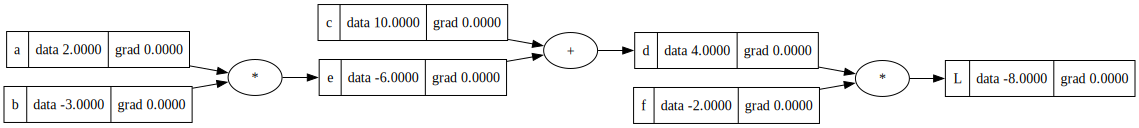

In [9]:
draw_dot(L)